# WEEK 4 AWP CASE STUDY

## Sales Analysis Project

#### Importing the needed libraries for this project

In [1]:
import numpy as np
import pandas as pd

#### Reading the dataset into pandas dataframe

In [2]:
sales = pd.read_csv('Sales.csv')
sales

,Date,Region,Category,Sales($),ProductID
0,01/09/2023,East,Electronics,1200.50,E1234
1,02/09/2023,West,Apparel,350.75,A4567
2,03/09/2023,North,Furniture,890.20,F7890
3,04/09/2023,South,Electronics,550.40,E2345
4,05/09/2023,East,Appliances,420.60,A6789
...,...,...,...,...,...
56,27/10/2023,North,Furniture,870.20,F3457
57,28/10/2023,South,Electronics,730.40,E4568
58,29/10/2023,East,Appliances,410.60,A6789
59,30/10/2023,West,Apparel,320.25,A7891


#### Coverting the 'Date' column into a datetime data type

In [12]:
''' with the help of the to_datetime method we convert the date column and assign it to itself to make the changes
   a permanent one. In doing this we specify how our current date is formatted.
'''

sales['Date'] = pd.to_datetime(sales['Date'], format = '%d/%m/%Y')

In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       61 non-null     datetime64[ns]
 1   Region     61 non-null     object        
 2   Category   61 non-null     object        
 3   Sales($)   61 non-null     float64       
 4   ProductID  61 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 2.5+ KB


#### Adding a 'month' column from the 'Date' column

In [19]:
sales['Month'] = sales['Date'].dt.month_name()
sales

,Date,Region,Category,Sales($),ProductID,Month
0,2023-09-01,East,Electronics,1200.50,E1234,September
1,2023-09-02,West,Apparel,350.75,A4567,September
2,2023-09-03,North,Furniture,890.20,F7890,September
3,2023-09-04,South,Electronics,550.40,E2345,September
4,2023-09-05,East,Appliances,420.60,A6789,September
...,...,...,...,...,...,...
56,2023-10-27,North,Furniture,870.20,F3457,October
57,2023-10-28,South,Electronics,730.40,E4568,October
58,2023-10-29,East,Appliances,410.60,A6789,October
59,2023-10-30,West,Apparel,320.25,A7891,October


#### Total sales for each month

In [23]:
# Using the groupby method we pass in our month column and sum the sales using the sum() function
sales.groupby('Month')['Sales($)'].sum()

Month
October      17354.65
September    17924.40
Name: Sales($), dtype: float64

#### Average daily sales for each month

In [26]:
# Using the 'groupby' method we pass in our month column and find the average sales using the mean() function
sales.groupby('Month')['Sales($)'].mean()

Month
October      559.827419
September    597.480000
Name: Sales($), dtype: float64

#### Region with the highest sales

In [53]:

''' We then sum the sales with the sum() function and group by the 'Region' column.
    We use the sort_value() method to sort in descending order by assigning
    the boolean value 'False' to its 'ascending' parameter which has a default value 
    of 'True'.
'''
sales.groupby('Region')['Sales($)'].sum().sort_values(ascending=False)

Region
North    12767.00
South     9385.00
East      7078.80
West      6048.25
Name: Sales($), dtype: float64

<Axes: xlabel='Region'>

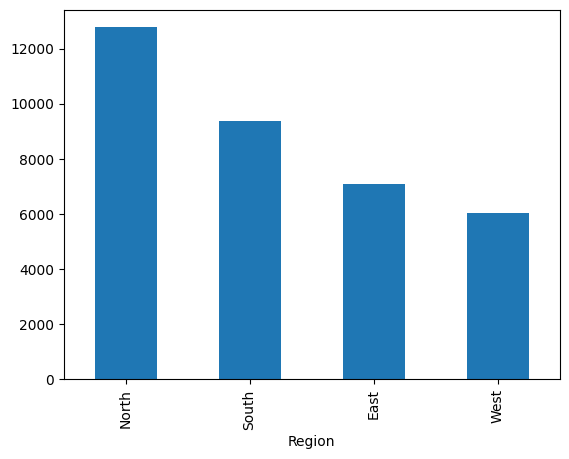

In [57]:
# Plotting a bar graph for sales by region
region_sales = sales.groupby('Region')['Sales($)'].sum().sort_values(ascending=False)
region_sales.plot.bar()

The region with the highest sales is the  North with 12,767.00 in sales

#### Product category with the lowest impact

Using Total sales by Category

In [35]:

''' We find the sum of values in the 'Sales($)' column and group by
    the 'Category' column.
    We then sort it in a descending order
'''

sales.groupby('Category')['Sales($)'].sum().sort_values(ascending=False)

Category
Furniture      12767.00
Electronics    10585.50
Apparel         6048.25
Appliances      5878.30
Name: Sales($), dtype: float64

Plotting Total sales by category

<Axes: title={'center': 'Total Sales by Category'}, ylabel='Sales($)'>

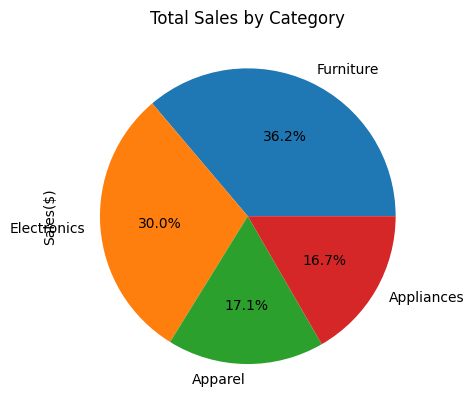

In [71]:
category_sales = sales.groupby('Category')['Sales($)'].sum().sort_values(ascending=False)
category_sales.plot(kind = 'pie', title = 'Total Sales by Category', autopct='%1.1f%%')

Using Total purchases by Category

In [55]:
sales.groupby(['Category'])['ProductID'].count().sort_values(ascending = False)

Category
Apparel        17
Appliances     15
Electronics    15
Furniture      14
Name: ProductID, dtype: int64

Plotting Total purchases by category

<Axes: title={'center': 'Total Purchases by Category'}, ylabel='Category'>

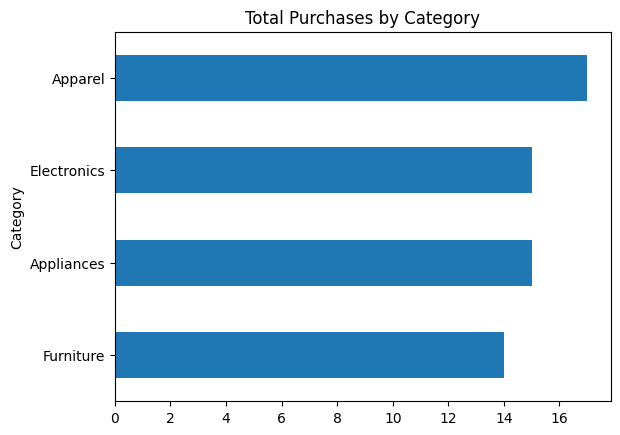

In [67]:
category_purchase = sales.groupby(['Category'])['ProductID'].count().sort_values()
category_purchase.plot(kind = 'barh', title = 'Total Purchases by Category')

Appliances is the category that has contributed least to the total sales(16.7%) though it ties with Electronics in second place for the most purchases (15 purchases)

#### Top Selling products

In [52]:

''' To find the top selling products, we use the count() function to find the number
    of times a ProductID occurs in the data and get the first 10 most occuring ProductID
    using the head() function which we pass in '10' after sorting in descending order
    We group by the ProductID and the respective categories.
'''

sales.groupby(['Category','ProductID'])['ProductID'].count().sort_values(ascending=False).head(10)

Category     ProductID
Appliances   A6789        6
Apparel      A1234        4
Electronics  E2345        4
Furniture    F5678        4
Electronics  E8903        2
             E4568        2
             E3456        2
Apparel      A2345        2
Furniture    F1236        2
Appliances   A4563        2
Name: ProductID, dtype: int64

Plotting top selling products

<Axes: title={'center': 'Top Selling Products'}, xlabel='Category,ProductID'>

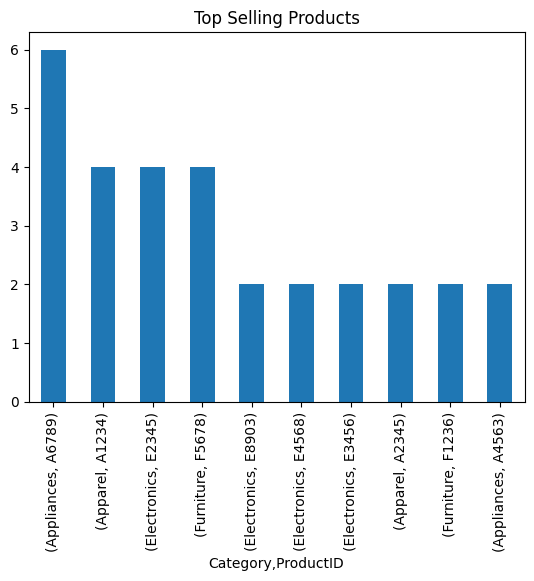

In [66]:
top_sell = sales.groupby(['Category','ProductID'])['ProductID'].count().sort_values(ascending=False).head(10)
top_sell.plot(kind = 'bar', title = 'Top Selling Products')

#### Recommendations to boost sales in November

1. The company should consider producing more of the most purchased products in November so as to boost sales and also find a way to boost sales for the lowest purchased products.

2. The company should find a way to increase sales in the West Region as it ranks last for total revenue generated and also to maintain customer satisfaction in the North as that is the region recording the highest sales for the two months combined(September and October).

3. For the lowest purchased products, a discount can be proposed so that it can be purchased more.

4. The company should focus on boosting their online presence through their social media handles and websites by engaging customers and also promoting their products with the help of influencers.

5. Measures should be put in place to reduce customer waiting time. Employing more shop attendants can help fix this issue. For the shop attendant role, it is advisable to focus on candidates that speak the local dialect of their regions. This can help to speed up purchases and reduce waiting time.

6. Though the Furniture category has recorded the highest revenue for the two months combined,it ranks last for most purchases. Management should maybe re-evaluate the prices for products under the Furniture category as the analysis raises concern that maybe the products under the Furniture category might be too expensive. Few purchases are being made but for huge sums of money.